### plotting figures and some stats for the neanderthal predixcan manuscript

#### load libraries, standard info

In [2]:
library(readr)
library(dplyr)
library(ggplot2)
library(fmsb)
library(PheWAS)
library(karyoploteR)
library(knitr)

abbreviations <- c("ADPS","ESPMC","ABPV","ESPMS","ADRNLG","HRTAA","BRNACC","HRTLV","ARTA","LIVER","ARTC","LUNG","ARTT","MSCSK","BRNCDT","NERVET","BRNCHB","OVARY",
                   "BRNCHA","PNCS","BRNCTX","PTTY","BRNFCTX","PRSTT","BRNHPP","SKINNS","BRNHPT","SKINS","BRNNCC","SMINT","BRNPTM","SPLEEN","BREAST","STMCH","TESTIS",
                   "FIBS","THYROID","CLNS","UTERUS","CLNT","VAGINA","ESPGJ","WHLBLD")
names(abbreviations) <- c("adipose_subcutaneous","esophagus_mucosa","adipose_visceral_omentum","esophagus_muscularis",
        "adrenal_gland","heart_atrial_appendage","anterior_cingulate_cortex","left_ventricle","artery_aorta","liver","artery_coronary",
        "lung","artery_tibial","muscle_skeletal","brain_caudate_basal_ganglia","nerve_tibial","brain_cerebellar_hemisphere","ovary",                                
        "brain_cerebellum","pancreas","brain_cortex","pituitary","brain_frontal_cortex","prostate","brain_hippocampus","skin_nosun_suprapubic","brain_hypothalamus",
        "skin_sun_lower_leg","brain_nucleus_accumbens_basal_ganglia","small_intestine_terminal_ileum","brain_putamen_basal_ganglia",
        "spleen","breast_mammary_tissue","stomach","testis","cells_transformed_fibroblasts","thyroid","colon_sigmoid","uterus",
        "colon_transverse","vagina","esophagus_gastroesophageal_junction","whole_blood")



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: tidyr
Loading required package: parallel
Loading required package: regioneR
Loading required package: memoise
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbin

#### plot counts of DR genes per tissue, filtered for Non-Introgressed genes

Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  X1 = col_character()
)
Joining, by = "gene_id"


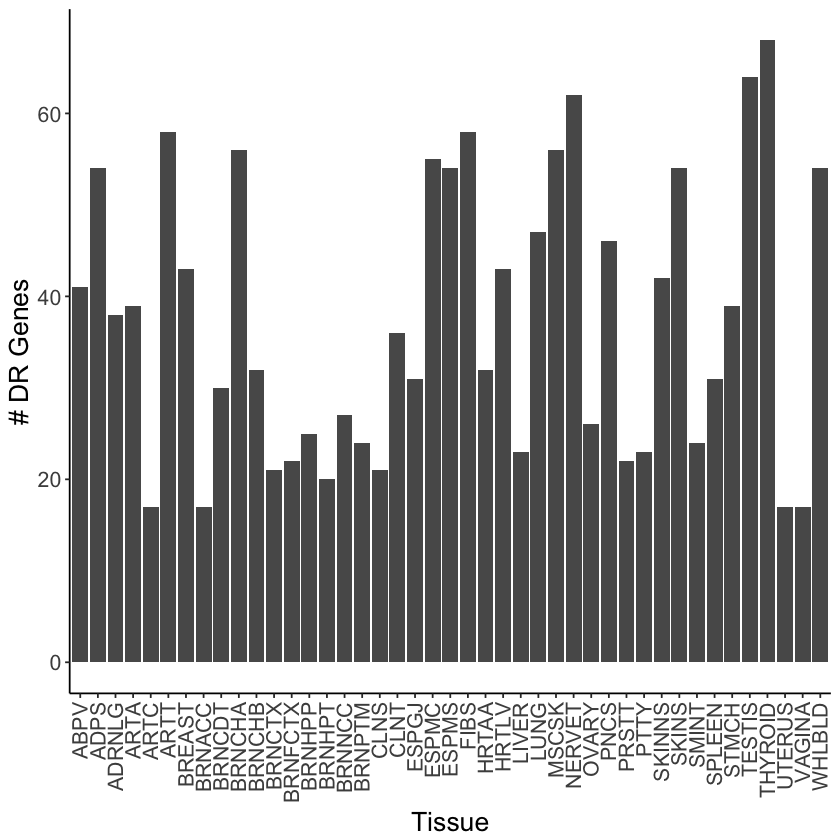

In [4]:
p_file_path <- "data/altai_original_pvalues_2sided.txt"
intro_path <- "data/altai_intro_genes.txt"

p_mat <- read_delim(p_file_path, "\t", escape_double = FALSE, trim_ws = TRUE)
intro <- read_csv(intro_path, col_names = FALSE)
intro$gene_id <- intro$X1
intro$X1 <- NULL
p_mat <- anti_join(p_mat, intro)
counts <- c()
tiss <- c()
for (i in 2:ncol(p_mat)) {
tiss <- c(tiss, names(p_mat[i]))
counts <- c(counts,nrow(p_mat[!is.na(p_mat[,i]) & p_mat[,i] == 0,]))
}
out <- data.frame(num = counts, Tissue = tiss)
for (i in 1:nrow(out)) {
out$abb[i] <- abbreviations[as.character(out$Tissue[i])]
}
ggplot(out, aes(x = abb, y = num)) + geom_bar(stat="identity") + labs(x="Tissue",y="# DR Genes") + 
theme_classic() + theme(text = element_text(size=16), axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))
ggsave('dr_gene_counts.pdf', width=7, height= 5) 

#### raw expression comparisons for non-introgressed genes based on introgression status

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character()
)
See spec(...) for full column specifications.
Joining, by = "X1"
Warning message:
"Column `X1` joining factor and character vector, coercing into character vector"Joining, by = "X1"
Joining, by = "X1"
Joining, by = "X1"
Joining, by = "gene_id"
Joining, by = "gene_id"
Warning message:
"Column `gene_id` joining character vector and factor, coercing into character vector"

[1] "Desert Mean:"

[1] 0.0002551554

[1] "Desert Max:"

[1] 0.006554611

[1] "Desert Min:"

[1] 0.05430711

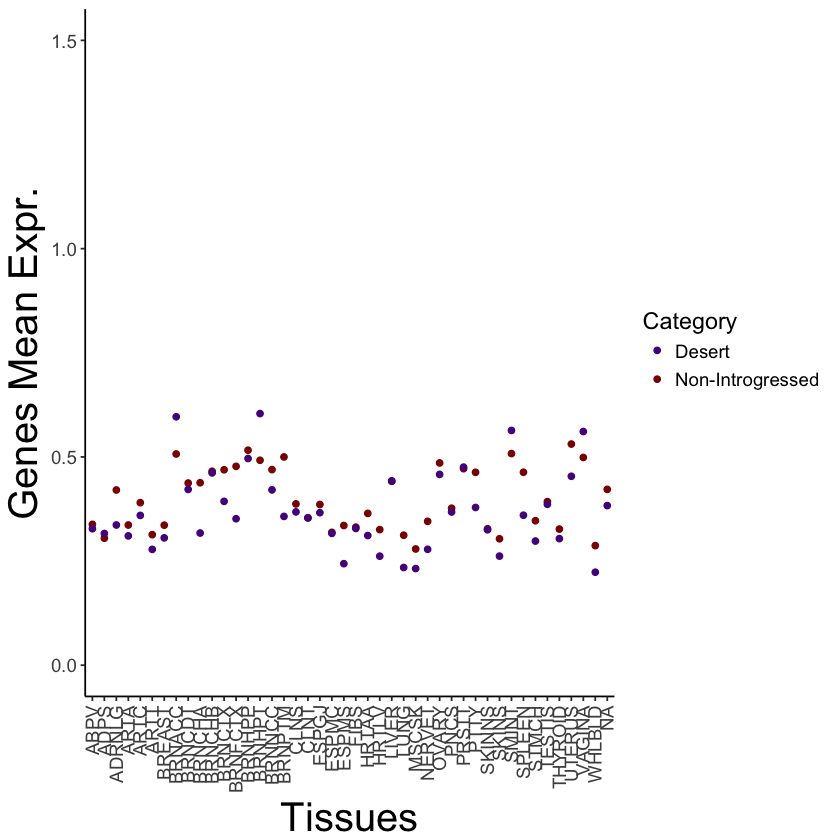

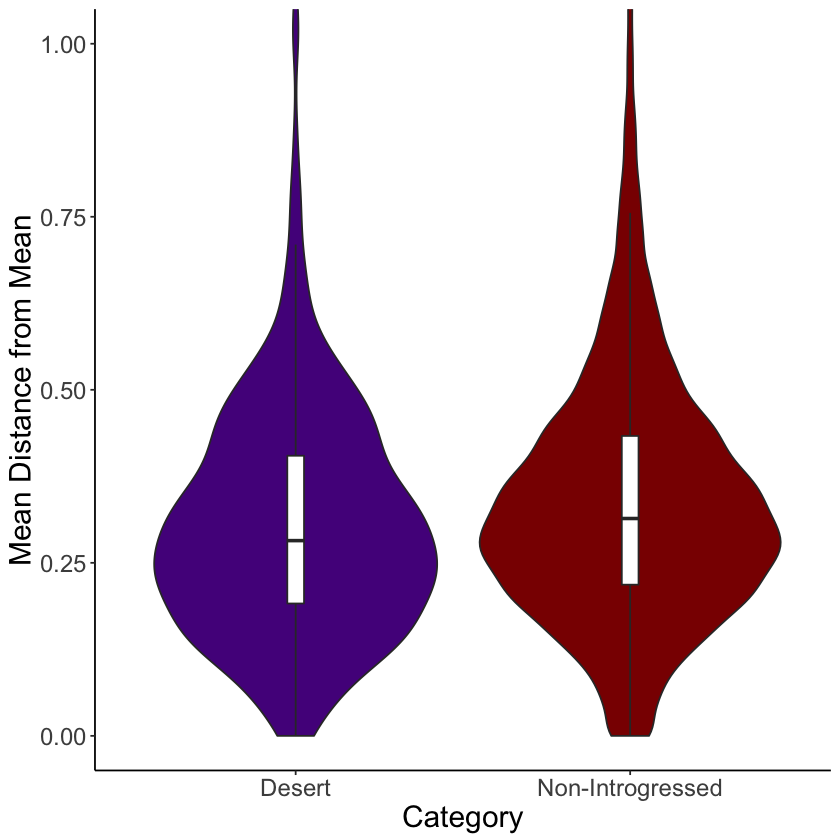

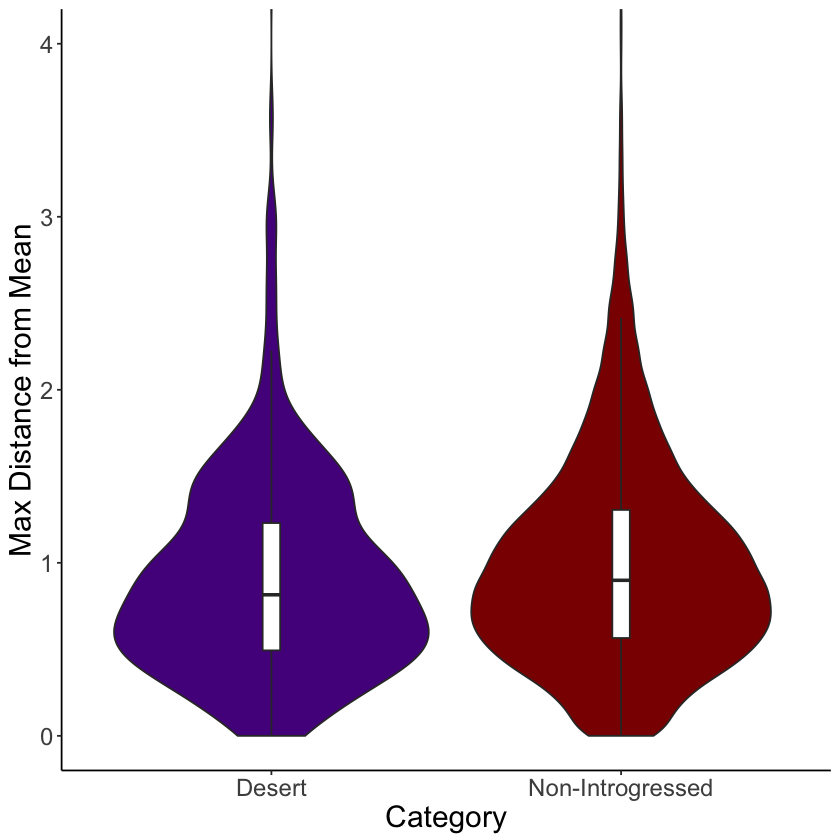

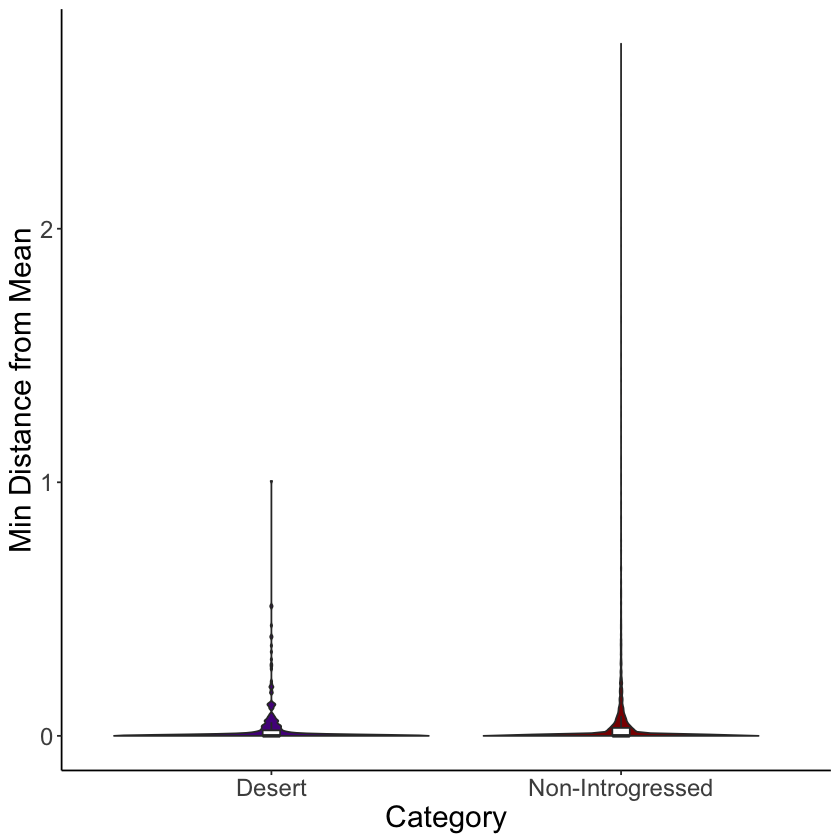

In [7]:
desert_file <- "data/altai_desert_genes.txt"
intro_file <- "data/altai_intro_genes.txt"
excl_file <- "data/altai_original_missingModels.txt"
pred_file <- "data/altai_original_predExp.txt"

desert_genes <- read_delim(desert_file,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)
intro_genes <- read_delim(intro_file,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)
excl_genes <- read_delim(excl_file,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)
altai_all <- read_delim(pred_file, "\t", escape_double = FALSE, trim_ws = TRUE)

for (i in 1:nrow(intro_genes)) {
    intro_genes[i,1] <- strsplit(intro_genes[i,1][[1]],"[.]")[[1]][1]
}
for (i in 1:nrow(desert_genes)) {
    desert_genes[i,1] <- strsplit(desert_genes[i,1][[1]],"[.]")[[1]][1]
}
for (i in 1:nrow(altai_all)) {
    altai_all[i,1] <- strsplit(altai_all[i,1][[1]],"[.]")[[1]][1]
}
for (i in 1:nrow(excl_genes)) {
    excl_genes[i,1] <- strsplit(excl_genes[i,1][[1]],"[.]")[[1]][1]
}

all_genes <- data.frame(X1 =altai_all$gene_id)
all_genes <- anti_join(all_genes,excl_genes)
desert_genes <- anti_join(desert_genes,excl_genes)
intro_genes <- anti_join(intro_genes,excl_genes)
desert_genes <- anti_join(desert_genes,intro_genes)

rows_to_remove <- c()
for (i in 1:nrow(all_genes)) {
    if (all_genes$X1[i] %in% desert_genes$X1 || all_genes$X1[i] %in% intro_genes$X1) {
      rows_to_remove <- c(rows_to_remove,i)
    }
}
control_genes <- data.frame(gene_id = all_genes[-rows_to_remove,])
desert_genes$gene_id <- desert_genes$X1
desert_genes$X1 <- NULL
remove(all_genes)

altai_all$count <- ncol(altai_all)-1
altai_all$mean <-  0
altai_all$max <- 0
altai_all$min <- 100
for (i in 2:(ncol(altai_all)-4)) {
    for (j in 1:nrow(altai_all)) {
      if (is.na(altai_all[j,i])) {
        altai_all$count[j] <- altai_all$count[j] -1
      } else {
        altai_all$mean[j] <- altai_all$mean[j] + abs(altai_all[j,i][[1]])
        if (abs(altai_all[j,i][[1]]) > altai_all$max[j]) { altai_all$max[j] <- abs(altai_all[j,i][[1]])}
        if (abs(altai_all[j,i][[1]])< altai_all$min[j]) {altai_all$min[j] <- abs(altai_all[j,i][[1]])}
      }
    }
}
altai_all$mean <- altai_all$mean/altai_all$count
altai_all$count <- NULL
desert_genes <- inner_join(altai_all,desert_genes)
control_genes <- inner_join(altai_all,control_genes)
remove(altai_all)

p_desert <- c()
mean_desert <- c()
mean_control <- c()
n <- c()
for (col in 2:(ncol(control_genes)-3)) {
    tmp <- data.frame(Expression = c(control_genes[,col][[1]],desert_genes[,col][[1]]),
                      Category = c(rep("Non-Introgressed",nrow(control_genes)), rep("Desert", nrow(desert_genes))))
    n <- c(n,names(control_genes)[col])
    #print(names(control_genes)[col])
    #print("Non-Intro Mean = ")
    #print(mean(abs(tmp[tmp$Category == "Non-Intro",]$Expression), na.rm = T))
    mean_control <- c(mean_control,mean(abs(tmp[tmp$Category == "Non-Introgressed",]$Expression), na.rm = T))
    new <- wilcox.test(abs(tmp[tmp$Category == "Desert",]$Expression), abs(tmp[tmp$Category == "Non-Introgressed",]$Expression))$p.value
    p_desert <- c(p_desert,new)
    #print("Desert mean = ")
    #print(mean(abs(tmp[tmp$Category == "Desert",]$Expression), na.rm = T))
    mean_desert <- c(mean_desert,mean(abs(tmp[tmp$Category == "Desert",]$Expression), na.rm = T))
    #print("p = ")
    #print(new)
}
remove(tmp)
p_values <- data.frame(Tissue = n,control_mean = mean_control,desert_mean = mean_desert,desert_p = p_desert)
p_values <- p_values[order(p_values$desert_p),]
p_values$desert_fdr <- "FAIL"
for (i in 1:nrow(p_values)) {
    p_values$desert_q[i] <- i*0.05/nrow(p_values)
    if (p_values$desert_p[i] < p_values$desert_q[i]) {p_values$desert_fdr[i] <- "PASS"}
}

means <- data.frame(tissue = rep(p_values$Tissue,2), mean = c(p_values$control_mean,p_values$desert_mean),
                  Category = c(rep("Non-Introgressed",nrow(p_values)), rep("Desert", nrow(p_values))))
for (i in 1:nrow(means)) {
    means$abb[i] <- abbreviations[as.character(means$tissue[i])]
}
ggplot(means,aes(x=abb,y=mean,color=Category)) + geom_point() + ylim(0,1.5) + theme_classic() + 
scale_colour_manual(values=c("purple4","darkred"))+
labs(x="Tissues",y="Genes Mean Expr.") + theme(text = element_text(size=14),axis.title.x= element_text(size = 24),axis.text.x=element_text(angle = 90,
                                                                                                  vjust = 0.5, hjust=1),axis.title.y=element_text(size = 24))

plots <- data.frame(Mean = c(control_genes$mean,desert_genes$mean), Max = c(control_genes$max,desert_genes$max),
                  Min = c(control_genes$min,desert_genes$min),
                  Category = c(rep("Non-Introgressed",nrow(control_genes)), rep("Desert", nrow(desert_genes))))

"Desert Mean:"
wilcox.test(plots[plots$Category == "Desert",]$Mean,plots[plots$Category == "Non-Introgressed",]$Mean)$p.value
"Desert Max:"
wilcox.test(plots[plots$Category == "Desert",]$Max,plots[plots$Category == "Non-Introgressed",]$Max)$p.value
"Desert Min:"
wilcox.test(plots[plots$Category == "Desert",]$Min,plots[plots$Category == "Non-Introgressed",]$Min)$p.value
ggplot(plots,aes(x=Category,y=Mean,fill=Category)) + geom_violin()+ geom_boxplot(width=0.05,fill="white",outlier.shape=NA) + 
    theme_classic() + scale_fill_manual(values=c("purple4","darkred"))+coord_cartesian(ylim=c(0,1))+
    labs(y="Mean Distance from Mean") + theme(text = element_text(size=18),legend.position = "none")##considering anything >1 as outlier
ggsave('mean_expr.pdf', width=6, height= 4) 
ggplot(plots,aes(x=Category,y=Max,fill=Category)) + geom_violin()+ geom_boxplot(width=0.05,fill="white",outlier.shape=NA) + 
    theme_classic() + scale_fill_manual(values=c("purple4","darkred"))+ coord_cartesian(ylim=c(0,4))+
    labs(y="Max Distance from Mean") +theme(text = element_text(size=18),legend.position = "none")##considering anything >4 as outlier
ggsave('max_expr.pdf', width=6, height= 4) 
ggplot(plots,aes(x=Category,y=Min,fill=Category)) + geom_violin()+ geom_boxplot(width=0.05,fill="white",outlier.shape=NA) + 
    theme_classic() + scale_fill_manual(values=c("purple4","darkred"))+
    labs(y="Min Distance from Mean") +theme(text = element_text(size=18),legend.position = "none")
ggsave('min_expr.pdf', width=6, height= 4) 

#### DR Odds ratio

In [33]:
desert_file <- "data/altai_desert_genes.txt"
intro_file <- "data/altai_intro_genes.txt"
excl_file <- "data/altai_original_missingModels.txt"
pred_file <- "data/altai_original_pvalues_2sided.txt"

desert_genes <- read_delim(desert_file,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)
intro_genes <- read_delim(intro_file,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)
excl_genes <- read_delim(excl_file,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)
altai_all <- read_delim(pred_file, "\t", escape_double = FALSE, trim_ws = TRUE)

for (i in 1:nrow(intro_genes)) {
    intro_genes[i,1] <- strsplit(intro_genes[i,1][[1]],"[.]")[[1]][1]
}
for (i in 1:nrow(desert_genes)) {
    desert_genes[i,1] <- strsplit(desert_genes[i,1][[1]],"[.]")[[1]][1]
}
for (i in 1:nrow(altai_all)) {
    altai_all[i,1] <- strsplit(altai_all[i,1][[1]],"[.]")[[1]][1]
}
for (i in 1:nrow(excl_genes)) {
    excl_genes[i,1] <- strsplit(excl_genes[i,1][[1]],"[.]")[[1]][1]
}

all_genes <- data.frame(X1 =altai_all$gene_id)
all_genes <- anti_join(all_genes,excl_genes)
desert_genes <- anti_join(desert_genes,excl_genes)
intro_genes <- anti_join(intro_genes,excl_genes)
desert_genes <- anti_join(desert_genes,intro_genes)

rows_to_remove <- c()
for (i in 1:nrow(all_genes)) {
    if (all_genes$X1[i] %in% desert_genes$X1 || all_genes$X1[i] %in% intro_genes$X1) {
      rows_to_remove <- c(rows_to_remove,i)
    }
}
control_genes <- data.frame(gene_id = all_genes[-rows_to_remove,])
desert_genes$gene_id <- desert_genes$X1
desert_genes$X1 <- NULL
remove(all_genes)

desert_genes <- inner_join(altai_all,desert_genes)
control_genes <- inner_join(altai_all,control_genes)

des_DR <- 0
cont_DR <- 0

# counting the genes in each category that are DR in any tissue
for (i in 1:(nrow(control_genes))) {
    if (0.0 %in% desert_genes[i,]) {
        des_DR <- des_DR + 1
    }
    if (0.0 %in% control_genes[i,]) {
        cont_DR <- cont_DR + 1
    }
}

des_norm <- nrow(desert_genes) - des_DR
cont_norm <- nrow(control_genes) - cont_DR

or <- oddsratio(des_DR,cont_DR,des_norm,cont_norm)
or

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character()
)
See spec(...) for full column specifications.
Joining, by = "X1"
Warning message:
"Column `X1` joining factor and character vector, coercing into character vector"Joining, by = "X1"
Joining, by = "X1"
Joining, by = "X1"
Joining, by = "gene_id"
Joining, by = "gene_id"
Warning message:
"Column `gene_id` joining character vector and factor, coercing into character vector"

           Disease Nondisease Total
Exposed         27        313   340
Nonexposed    1305      11453 12758
Total         1332      11766 13098



	Odds ratio estimate and its significance probability

data:  des_DR cont_DR des_norm cont_norm
p-value = 0.1684
95 percent confidence interval:
 0.5088542 1.1263232
sample estimates:
[1] 0.7570563


Category,DRStatus,perc
Desert,DR,0.07941176
Non-Introgressed,DR,0.10228876
Desert,Non-DR,0.92058824
Non-Introgressed,Non-DR,0.89771124


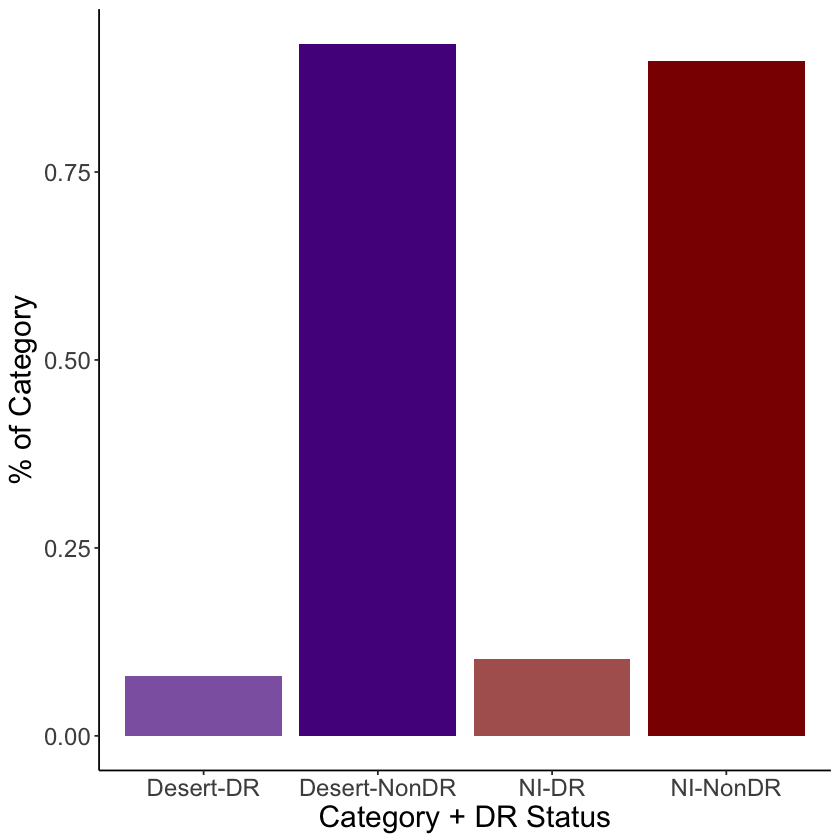

In [74]:
d <- data.frame(Category = c("Desert","Non-Introgressed","Desert","Non-Introgressed"),
                DRStatus = c("DR","DR","Non-DR","Non-DR"),
        perc = c(des_DR/nrow(desert_genes),cont_DR/nrow(control_genes),des_norm/nrow(desert_genes),cont_norm/nrow(control_genes)))
d

ggplot(d, aes(x=interaction(Category, DRStatus,lex.order=T), y=perc,fill=Category,alpha=DRStatus)) + geom_bar(stat = "identity",alpha=c(0.7,1,0.7,1))+ theme_classic() +
theme(text = element_text(size=18),legend.position = "none") +labs(y="% of Category",x="Category + DR Status")+ scale_fill_manual(values=c("purple4","darkred"))+
scale_x_discrete(labels=c("Desert-DR", "Desert-NonDR","NI-DR","NI-NonDR"))
ggsave('desert_DR_perc.pdf', width=6, height= 4) 

#### groups phenotypes and counts associations per group

Parsed with column specification:
cols(
  tissue = col_character(),
  phecode = col_character(),
  beta = col_double(),
  `p-value` = col_double(),
  gene = col_character(),
  trait = col_character(),
  r2 = col_double(),
  `no of cases` = col_integer(),
  `no of controls` = col_integer()
)


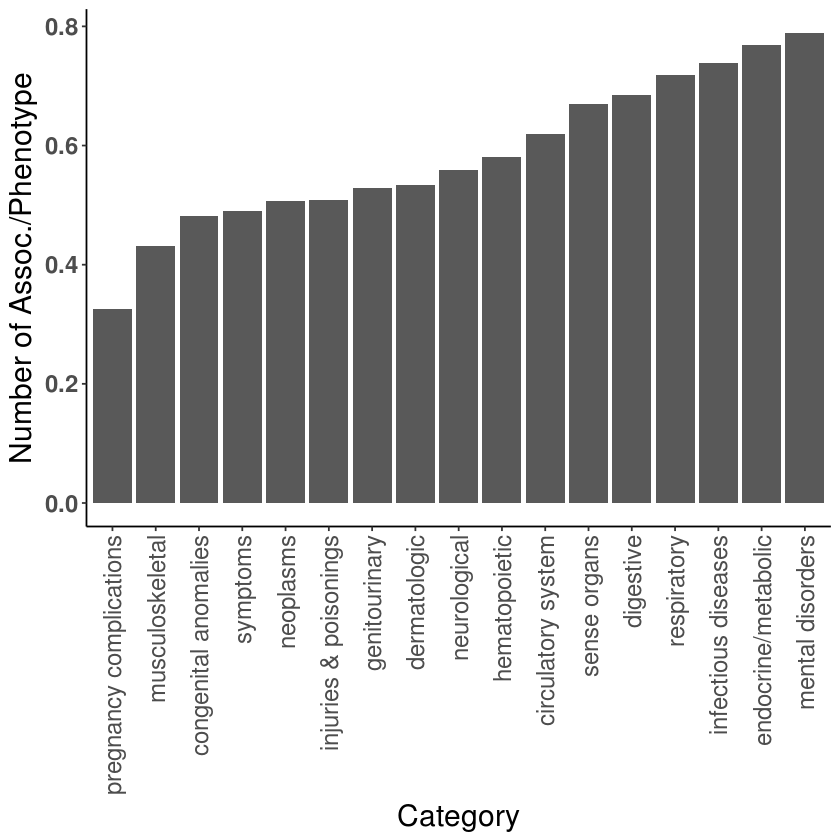

In [8]:
top_genes <- "altai_dr_phewas.txt"

full_assoc_nean <- read_delim(top_genes, "\t", escape_double = FALSE, trim_ws = TRUE)
data(pheinfo)
full_assoc_nean$group <- "none"
full_assoc_nean <- full_assoc_nean[((full_assoc_nean$`p-value` < 0.00001) & (full_assoc_nean$`p-value` > 0)),]
for (row in 1:nrow(pheinfo)) {
    phecode <- pheinfo$phecode[row]
    if (startsWith(phecode, "00")) {phecode <- substr(phecode,3,nchar(phecode))}
    if (startsWith(phecode, "0")) {phecode <- substr(phecode,2,nchar(phecode))}
    if (paste("X",phecode,sep="") %in% full_assoc_nean$phecode) {
      full_assoc_nean[full_assoc_nean$phecode == paste("X",phecode,sep=""),]$group <- pheinfo$group[row]
    }
}
full_assoc_nean$sum <- 1
counts <- full_assoc_nean %>% group_by(group) %>% summarise(sum = sum(sum))
counts$t_sum <- 0
for (row in 1:nrow(counts)) {
    counts$t_sum[row] <- nrow(pheinfo[pheinfo$group == counts$group[row],])
}
counts$prop <- counts$sum/counts$t_sum
ggplot(counts,aes(x=reorder(group,prop),y=prop)) + ylab("# Assoc. per Phenotype") + xlab("Phenotype Category") + theme_classic() + 
theme(legend.position = "none",text = element_text(size=18),axis.text.x = element_text(angle = 90,vjust=0.5,
           hjust=1),axis.text.y = element_text(face = "bold")) + geom_bar(stat="identity")
ggsave('phewas_counts.pdf', width=6, height= 6) 

#### Odds Ratios for DR genes being associated with a particular phenotype group

Parsed with column specification:
cols(
  tissue = col_character(),
  phecode = col_character(),
  beta = col_double(),
  `p-value` = col_double(),
  gene = col_character(),
  trait = col_character(),
  r2 = col_double(),
  `no of cases` = col_integer(),
  `no of controls` = col_integer()
)
Parsed with column specification:
cols(
  tissue = col_character(),
  phecode = col_character(),
  beta = col_double(),
  `p-value` = col_double(),
  gene = col_character(),
  trait = col_character(),
  r2 = col_double(),
  `no of cases` = col_integer(),
  `no of controls` = col_integer()
)
Parsed with column specification:
cols(
  `#names` = col_character()
)
Joining, by = "gene"
Joining, by = "gene"


           Disease Nondisease Total
Exposed         27        568   595
Nonexposed      73       1833  1906
Total          100       2401  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         27        568   595
Nonexposed      73       1833  1906
Total          100       2401  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         34        561   595
Nonexposed     128       1778  1906
Total          162       2339  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         34        561   595
Nonexposed     128       1778  1906
Total          162       2339  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         28        567   595
Nonexposed     153       1753  1906
Total          181       2320  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         28        567   595
Nonexposed     153       1753  1906
Total          181       2320  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         46        549   595
Nonexposed     150       1756  1906
Total          196       2305  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         46        549   595
Nonexposed     150       1756  1906
Total          196       2305  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         53        542   595
Nonexposed     135       1771  1906
Total          188       2313  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         53        542   595
Nonexposed     135       1771  1906
Total          188       2313  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         64        531   595
Nonexposed     210       1696  1906
Total          274       2227  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         64        531   595
Nonexposed     210       1696  1906
Total          274       2227  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         54        541   595
Nonexposed     131       1775  1906
Total          185       2316  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         54        541   595
Nonexposed     131       1775  1906
Total          185       2316  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         29        566   595
Nonexposed      74       1832  1906
Total          103       2398  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         29        566   595
Nonexposed      74       1832  1906
Total          103       2398  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         12        583   595
Nonexposed      57       1849  1906
Total           69       2432  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         12        583   595
Nonexposed      57       1849  1906
Total           69       2432  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         81        514   595
Nonexposed     226       1680  1906
Total          307       2194  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         81        514   595
Nonexposed     226       1680  1906
Total          307       2194  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         20        575   595
Nonexposed      99       1807  1906
Total          119       2382  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         20        575   595
Nonexposed      99       1807  1906
Total          119       2382  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         31        564   595
Nonexposed     123       1783  1906
Total          154       2347  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         31        564   595
Nonexposed     123       1783  1906
Total          154       2347  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed          4        591   595
Nonexposed      28       1878  1906
Total           32       2469  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed          4        591   595
Nonexposed      28       1878  1906
Total           32       2469  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         49        546   595
Nonexposed     150       1756  1906
Total          199       2302  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         49        546   595
Nonexposed     150       1756  1906
Total          199       2302  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         36        559   595
Nonexposed      75       1831  1906
Total          111       2390  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         36        559   595
Nonexposed      75       1831  1906
Total          111       2390  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed          9        586   595
Nonexposed      44       1862  1906
Total           53       2448  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed          9        586   595
Nonexposed      44       1862  1906
Total           53       2448  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         18        577   595
Nonexposed      50       1856  1906
Total           68       2433  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"

           Disease Nondisease Total
Exposed         18        577   595
Nonexposed      50       1856  1906
Total           68       2433  2501


Warning message in N1 * N0 * M1 * M0:
"NAs produced by integer overflow"



|phenotypes              |        ors| pvalue|        low|       high|
|:-----------------------|----------:|------:|----------:|----------:|
|infectious diseases     |  0.1769653|     NA| -0.2744385|  0.6283690|
|injuries & poisonings   | -0.1721462|     NA| -0.5620297|  0.2177373|
|respiratory             | -0.5695088|     NA| -0.9833630| -0.1556547|
|neoplasms               | -0.0192986|     NA| -0.3632591|  0.3246620|
|sense organs            |  0.2490508|     NA| -0.0829075|  0.5810091|
|digestive               | -0.0269587|     NA| -0.3232998|  0.2693825|
|genitourinary           |  0.3019231|     NA| -0.0293338|  0.6331801|
|dermatologic            |  0.2378002|     NA| -0.2018209|  0.6774213|
|symptoms                | -0.4039316|     NA| -1.0333733|  0.2255101|
|endocrine/metabolic     |  0.1582400|     NA| -0.1141311|  0.4306110|
|neurological            | -0.4543343|     NA| -0.9439168|  0.0352482|
|musculoskeletal         | -0.2271988|     NA| -0.6323173|  0.1779197|
|pre

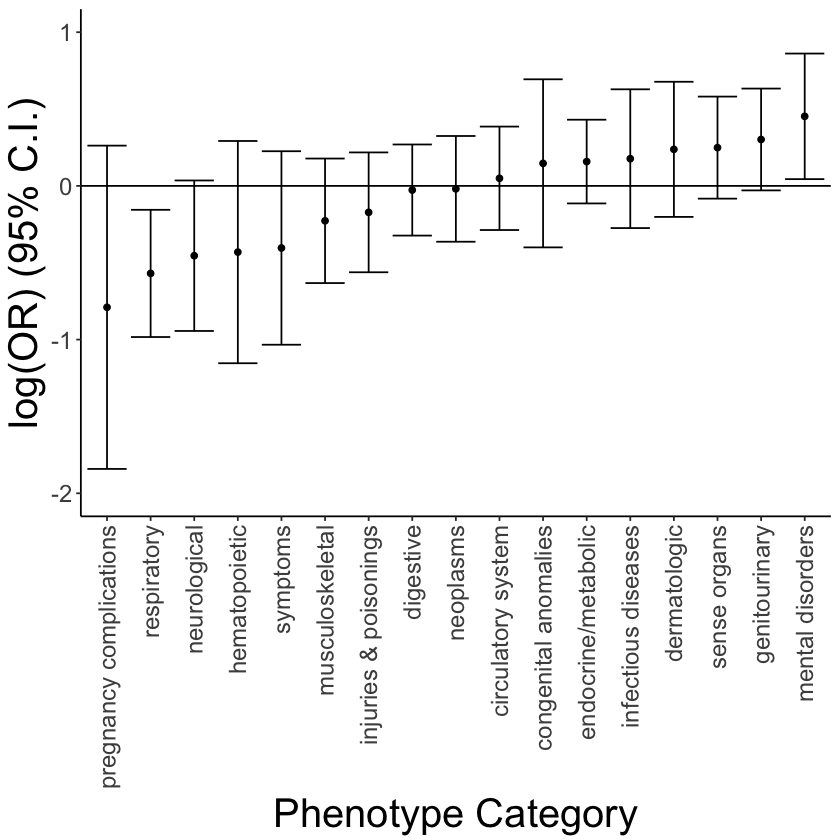

In [42]:
top_genes <- "altai_dr_phewas.txt"
control <- "altai_control_phewas.txt"

data(pheinfo)
full_assoc_nean <- read_delim(top_genes, "\t", escape_double = FALSE, trim_ws = TRUE)
full_control <- read_delim(control, "\t", escape_double = FALSE, trim_ws = TRUE)

## if filtering by introgression status of genes:
intro_genes <- read_csv("data/altai_intro_genes_names.txt")
intro_genes$gene <- intro_genes$`#names`
intro_genes$`#names` <- NULL

# get introgressed genes
#full_assoc_nean <- inner_join(full_assoc_nean, intro_genes)
#full_control <- inner_join(full_control, intro_genes)
# get non-Introgressed genes
full_assoc_nean <- anti_join(full_assoc_nean, intro_genes)
full_control <- anti_join(full_control, intro_genes)

full_assoc_nean$group <- "none"
full_assoc_nean <- full_assoc_nean[((full_assoc_nean$`p-value` < 0.00001) & (full_assoc_nean$`p-value` > 0)),]
full_control$group <- "none"
full_control <- full_control[((full_control$`p-value` < 0.00001) & (full_control$`p-value` > 0)),]
for (row in 1:nrow(pheinfo)) {
    phecode <- pheinfo$phecode[row]
    if (startsWith(phecode, "00")) {phecode <- substr(phecode,3,nchar(phecode))}
    if (startsWith(phecode, "0")) {phecode <- substr(phecode,2,nchar(phecode))}
    if (paste("X",phecode,sep="") %in% full_control$phecode) {
      full_control[full_control$phecode == paste("X",phecode,sep=""),]$group <- pheinfo$group[row]
    }
    if (paste("X",phecode,sep="") %in% full_assoc_nean$phecode) {
      full_assoc_nean[full_assoc_nean$phecode == paste("X",phecode,sep=""),]$group <- pheinfo$group[row]
    }
}
ORs <- data.frame(phenotypes = unique(full_assoc_nean$group), ors = 0)
for (row in 1:nrow(ORs)) {
    phen_nean <- nrow(full_assoc_nean[full_assoc_nean$group == ORs$phenotypes[row],])
    phen_control <- nrow(full_control[full_control$group == ORs$phenotypes[row],])
    norm_nean <- nrow(full_assoc_nean[full_assoc_nean$group != ORs$phenotypes[row],])
    norm_control <- nrow(full_control[full_control$group != ORs$phenotypes[row],])
    ORs$ors[row] <- log(oddsratio(phen_nean,phen_control,norm_nean,norm_control)$estimate)
    ORs$pvalue[row] <- oddsratio(phen_nean,phen_control,norm_nean,norm_control)$p.value
    ORs$low[row] <- ORs$ors[row]-1.96*sqrt((1/phen_nean)+(1/phen_control)+(1/norm_nean)+(1/norm_control))
    ORs$high[row] <- ORs$ors[row]+1.96*sqrt((1/phen_nean)+(1/phen_control)+(1/norm_nean)+(1/norm_control))
}
ggplot(ORs,aes(x=reorder(phenotypes,ors),y=ors)) + geom_point() + theme_classic() +
    theme(text = element_text(size=18),axis.title.x= element_text(size = 24),axis.text.x=element_text(angle = 90,vjust = 0.5,hjust=1),axis.title.y=element_text(size = 24)) + geom_errorbar(aes(ymin = low,ymax = high)) + 
    geom_hline(yintercept=0,color = "black")+ xlab("Phenotype Category") + ylab("log(OR) (95% C.I.)") +ylim(-2,1)
ggsave('phewas_ors.pdf', width=6, height= 6) 
kable(ORs)

#### Counts of Derived SNPs

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  `#gene` = col_character(),
  snp_count = col_integer()
)
Warning message:
“Unknown or uninitialised column: '#gene'.”Warning message:
“Unknown or uninitialised column: '#gene'.”

[1] 179.7807

[1] 141.9139

[1] 144.3651

[1] 9.23779e-19

[1] 1.02252e-15

Warning message:
“Removed 28 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 28 rows containing non-finite values (stat_boxplot).”

Warning message:
“Removed 28 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 28 rows containing non-finite values (stat_boxplot).”

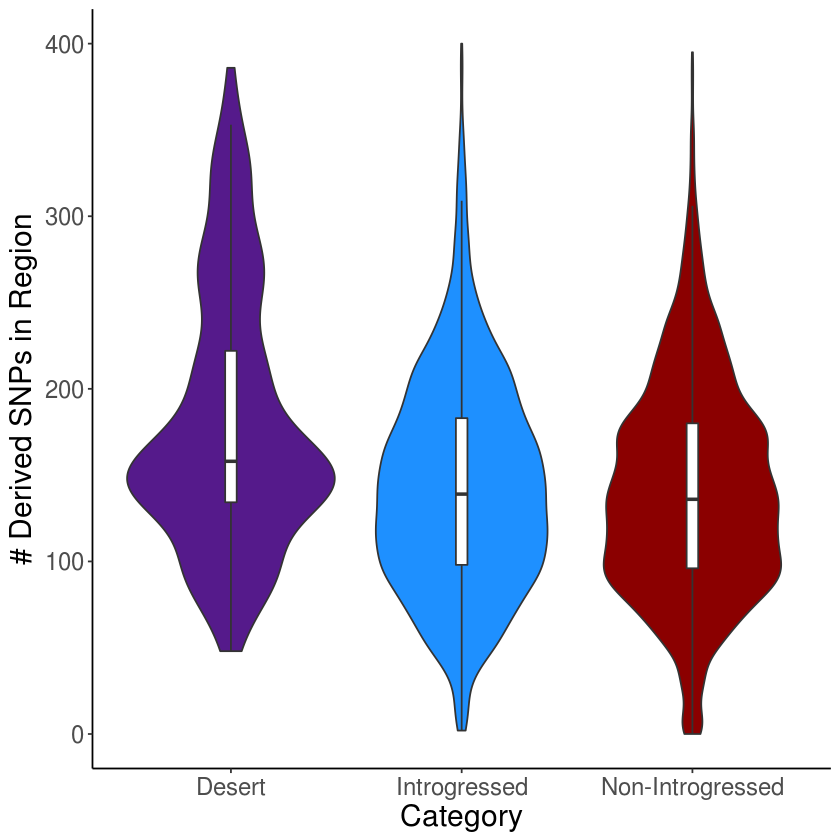

In [31]:
der_file <- "data/gene-dersnp_intersection.txt"
desert_file <- "data/altai_desert_genes.txt"
intro_file <- "data/altai_intro_genes.txt"
excl_file <- "data/altai_original_missingModels.txt"

excl_genes <- read_delim(excl_file,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)
desert_genes <- read_delim(desert_file,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)
intro_genes <- read_delim(intro_file,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)
der_snps <- read_delim(der_file,"\t", escape_double = FALSE, col_names = TRUE, trim_ws = TRUE)

for (i in 1:nrow(desert_genes)) {
    desert_genes$`#gene`[i] <- strsplit(desert_genes$X1[i],"\\.")[[1]][1]
}
for (i in 1:nrow(intro_genes)) {
    intro_genes$`#gene`[i] <- strsplit(intro_genes$X1[i],"\\.")[[1]][1]
}
for (i in 1:nrow(excl_genes)) {
    excl_genes[i,1] <- strsplit(excl_genes[i,1][[1]],"[.]")[[1]][1]
}
excl_genes$`#gene` <- excl_genes$X1
excl_genes$X1 <- NULL
der_snps$Category <- "Non-Introgressed"
for (i in 1:nrow(der_snps)){
    if (der_snps$`#gene`[i] %in% intro_genes$`#gene`) {
        der_snps$Category[i] <- "Introgressed"
    }else {if(der_snps$`#gene`[i] %in% desert_genes$`#gene`) {
        der_snps$Category[i] <- "Desert"
    }}
}
#der_snps <- anti_join(der_snps,excl_genes)

mean(der_snps[der_snps$Category == "Desert",]$snp_count)
mean(der_snps[der_snps$Category == "Non-Introgressed",]$snp_count)
mean(der_snps[der_snps$Category == "Introgressed",]$snp_count)
wilcox.test(der_snps[der_snps$Category == "Desert",]$snp_count,der_snps[der_snps$Category == "Non-Introgressed",]$snp_count)$p.value
wilcox.test(der_snps[der_snps$Category == "Desert",]$snp_count,der_snps[der_snps$Category == "Introgressed",]$snp_count)$p.value

ggplot(der_snps,aes(x=Category,y=snp_count,fill=Category)) + geom_violin()+
  geom_boxplot(width=0.05,fill="white",outlier.shape=NA) +theme_classic() + scale_fill_manual(values=c("purple4","dodgerblue","darkred"))+
labs(y="# Derived SNPs in Region") +theme(text = element_text(size=18),legend.position = "none")+ylim(0,400)#considering everything > 400 outlier
ggsave('der_snps.pdf', width=6, height= 4) 

In [28]:
head(der_snps)

#gene,snp_count,Category
ENSG00000163563,135,Non-Introgressed
ENSG00000049239,164,Non-Introgressed
ENSG00000141127,118,Non-Introgressed
ENSG00000102977,71,Non-Introgressed
ENSG00000180869,253,Non-Introgressed
ENSG00000128607,176,Introgressed


#### Plot GO associations

Parsed with column specification:
cols(
  geneset = col_character(),
  description = col_character(),
  link = col_character(),
  C = col_integer(),
  O = col_integer(),
  E = col_double(),
  R = col_double(),
  PValue = col_double(),
  FDR = col_double(),
  overlapGene = col_character(),
  OverlapGene_UserID = col_character()
)


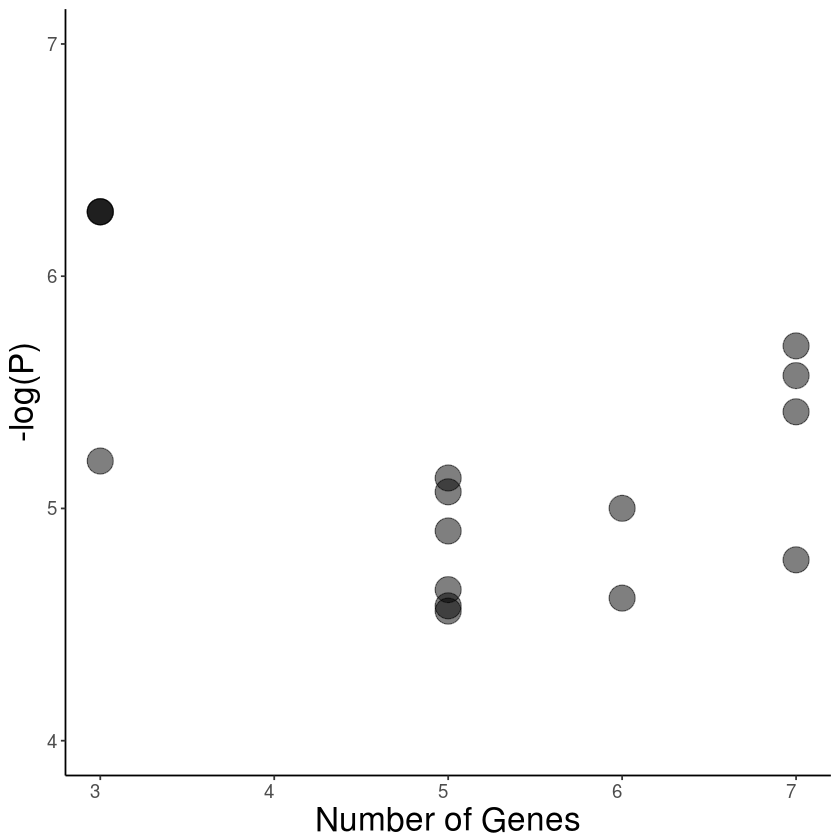

In [30]:
enr_file <- "species_diff_GO/altVindenrichment_results.txt"

enrichments <- read_delim(enr_file,"\t", escape_double = FALSE, col_names = TRUE, trim_ws = TRUE)
enrichments$logp <- log(enrichments$PValue,base=10)
ggplot(enrichments[enrichments$FDR < 0.05,],aes(x=O,y=-logp)) + geom_point(alpha=0.5,size=7) + theme_classic() + 
labs(x="Number of Genes",y="-log(P)") + theme(text = element_text(size=14),axis.title.x= element_text(size = 20),
                axis.text.x=element_text(vjust = 0.5, hjust=1),axis.title.y=element_text(size = 20))+ylim(4,7)
ggsave('GO_plot.pdf', width=6, height= 4) 

#### Plot Desert Genes on chromosomes

pdf 
  3

pdf 
  2

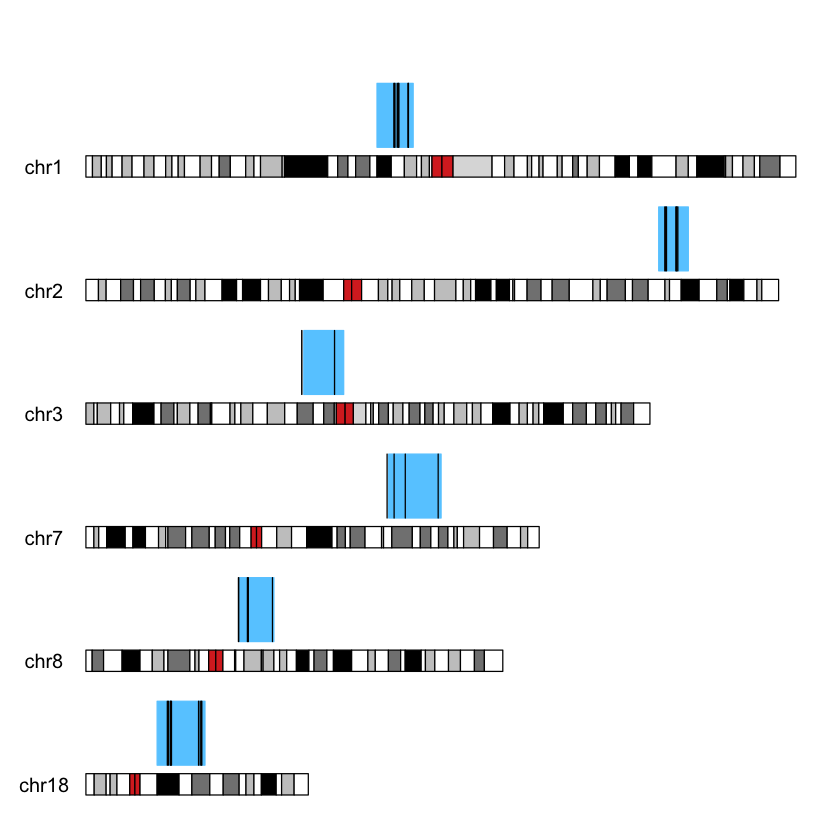

In [5]:
gene_file <- "~/Dropbox (VU Basic Sciences)/predixcan/results/introgression/desert_dr_genes.bed"
deserts <- "~/Dropbox (VU Basic Sciences)/predixcan/data/nean_deserts.bed"

dr_genes <- read.delim(gene_file, header=FALSE, stringsAsFactors=FALSE)
des <- read.delim(deserts, header=FALSE, stringsAsFactors=FALSE,comment.char = "#")
for (i in 1:nrow(dr_genes)){
    dr_genes$V1[i] <- paste("chr",dr_genes$V1[i],sep="")
}
for (i in 1:nrow(des)){
    des$V1[i] <- paste("chr",des$V1[i],sep="")
}

#chrms <- unique(dr_genes$V1))
chrms <- c("chr1","chr2","chr3","chr7","chr8","chr18")
genes <- makeGRangesFromDataFrame(data_frame(chr = dr_genes$V1, start=dr_genes$V2,end=dr_genes$V3))
deserts <- makeGRangesFromDataFrame(data_frame(chr = des$V1, start=des$V2,end=des$V3))
values(genes) <- DataFrame(names=c("ZDBF2","PIK3C3","VAV3","RB1CC1","CHMP2B","PSRC1","GAREM1","RIT2","STXBP3","BMPR2","ZNF717","THAP5","ADAM23","CELSR2","DSG3","TGS1","SYPL1","ST7L","TMEM229A","CPO","MOV10","CARF","LSMEM1","BHLHE22","MOS","RNF138","DSC3"))

kp <-plotKaryotype(genome="hg19", chromosomes=chrms)
#kpPlotMarkers(kp, data=genes,labels=genes$names,text.orientation = "vertical",
#              r1=0.5, cex=0.8,label.dist = .00001,  adjust.label.position = T)
kpPlotRegions(kp, deserts, col="#66ccff",r1=0.75)
kpPlotRegions(kp, data=genes,r1=0.75)
dev.copy(pdf,"desert_genes.pdf",width = 10, height = 3)
dev.off()

#### plot 1kG distribution of a gene

Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  X1 = col_character()
)


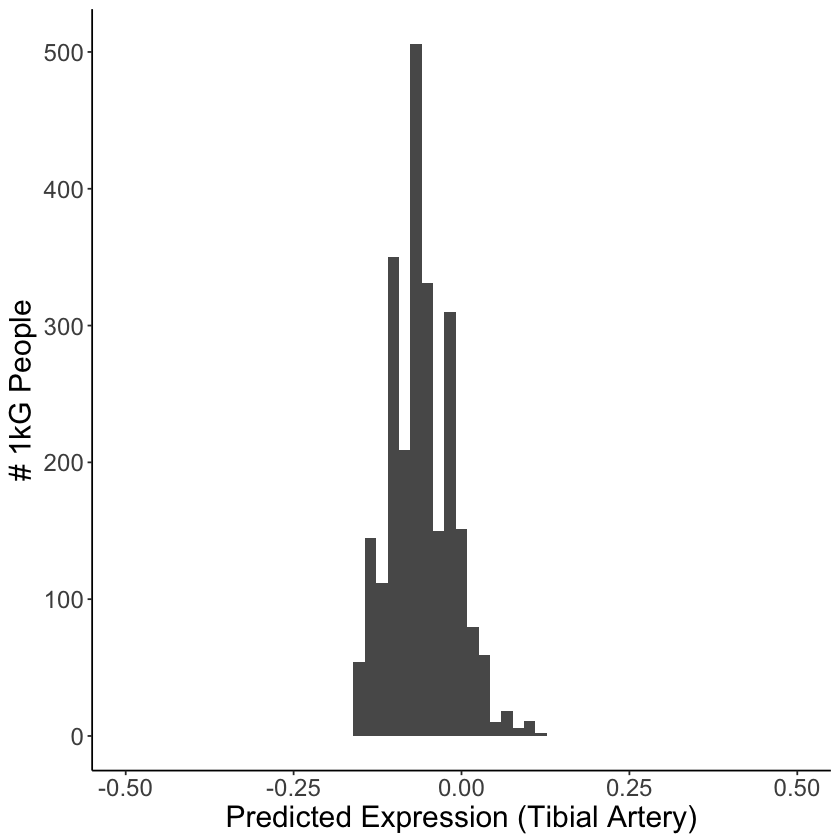

In [8]:
dist <- read.delim("~/Dropbox (VU Basic Sciences)/predixcan/results/exp_dist_1kG/zdbf2_tibArt.txt",header =F)
dist$V1 <- NULL
p_file_path <- "data/altai_original_pvalues_2sided.txt"
intro_path <- "data/altai_intro_genes.txt"

p_mat <- read_delim(p_file_path, "\t", escape_double = FALSE, trim_ws = TRUE)
intro <- read_csv(intro_path, col_names = FALSE)
dist <- as.data.frame(t(dist))

ggplot(dist,aes(V1)) + geom_histogram(bins = 60) + xlab("Predicted Expression (Tibial Artery)") + ylab("# 1kG People") + theme_classic() +
  theme(text = element_text(size=18),axis.title.x= element_text(size = 18),axis.title.y=element_text(size = 18)) +xlim(-0.5,0.5)
ggsave("dist.pdf",width=5, height=4)

#### predicted expression correlations between Altai genomes

In [49]:
original_path <- "data/altai_original_predExp.txt"
update_path <- "data/altai_update_predExp.txt"
excl1_path <- "data/altai_original_missingModels.txt"
excl2_path <- "data/altai_update_missingModels.txt"

orig_mat <- read_delim(original_path, "\t", escape_double = FALSE, trim_ws = TRUE)
upd_mat <- read_delim(update_path, "\t", escape_double = FALSE, trim_ws = TRUE)
excl1 <- read_delim(excl1_path,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)
excl2 <- read_delim(excl2_path,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)

excl1$gene_id <- excl1$X1
excl1$X1 <- NULL
excl2$gene_id <- excl2$X1
excl2$X1 <- NULL

orig_mat <- anti_join(anti_join(orig_mat,excl1),excl2)
upd_mat <- anti_join(anti_join(upd_mat,excl1),excl2)
out <- DataFrame(tissue = rep("nil",ncol(orig_mat)-1))
for (i in 2:ncol(orig_mat)) {
    out$tissue[i-1] <- names(orig_mat)[i]
    out$rho[i-1] <- cor.test(orig_mat[,i][[1]],upd_mat[,i][[1]],method = "spearman")$estimate
    out$p[i-1] <- cor.test(orig_mat[,i][[1]],upd_mat[,i][[1]],method = "spearman")$p.value
}
mean(out$rho)
kable(out)

Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Joining, by = "gene_id"
Joining, by = "gene_id"
Joining, by = "gene_id"
Joining, by = "gene_id"
Warning message in cor.test.default(orig_mat[, i][[1]], upd_mat[, i][[1]], method = "spearman"):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(orig_mat[, i][[1]], upd_mat[, i][[1]], method = "spearman"):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(orig_mat[, i][[1]], upd_mat[, i][[1]], method = "spearman"):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(orig_mat[, i][[1]], upd_mat[, i][[1]], me

"Cannot compute exact p-value with ties"Warning message in cor.test.default(orig_mat[, i][[1]], upd_mat[, i][[1]], method = "spearman"):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(orig_mat[, i][[1]], upd_mat[, i][[1]], method = "spearman"):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(orig_mat[, i][[1]], upd_mat[, i][[1]], method = "spearman"):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(orig_mat[, i][[1]], upd_mat[, i][[1]], method = "spearman"):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(orig_mat[, i][[1]], upd_mat[, i][[1]], method = "spearman"):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(orig_mat[, i][[1]], upd_mat[, i][[1]], method = "spearman"):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(orig_mat[, i][[1]], upd_mat[, i][[1]], method = "spearman"):
"Cannot compute exact p-value with ties"W

[1] 0.8117608



|tissue                                |       rho|  p|
|:-------------------------------------|---------:|--:|
|adipose_subcutaneous                  | 0.8354703|  0|
|esophagus_mucosa                      | 0.8324968|  0|
|adipose_visceral_omentum              | 0.8248803|  0|
|esophagus_muscularis                  | 0.8284796|  0|
|adrenal_gland                         | 0.8113760|  0|
|heart_atrial_appendage                | 0.8045131|  0|
|anterior_cingulate_cortex             | 0.7928536|  0|
|left_ventricle                        | 0.8110262|  0|
|artery_aorta                          | 0.8216417|  0|
|liver                                 | 0.7944327|  0|
|artery_coronary                       | 0.7950425|  0|
|lung                                  | 0.8267054|  0|
|artery_tibial                         | 0.8352358|  0|
|muscle_skeletal                       | 0.8300338|  0|
|brain_caudate_basal_ganglia           | 0.7862996|  0|
|nerve_tibial                          | 0.848